In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# 加载股票价时间序列
stock_px = pd.read_csv('D:/资料/python资料/利用Python进行数据分析/ch11/stock_px.csv',parse_dates=True,index_col=0)
prices = stock_px.ix['2011-9-6':'2011-9-14',['AAPL','JNJ','SPX','XOM']]
prices

,AAPL,JNJ,SPX,XOM
2011-09-06,379.74,64.64,1165.24,71.15
2011-09-07,383.93,65.43,1198.62,73.65
2011-09-08,384.14,64.95,1185.90,72.82
2011-09-09,377.48,63.64,1154.23,71.01
2011-09-12,379.94,63.59,1162.27,71.84
2011-09-13,384.62,63.61,1172.87,71.65
2011-09-14,389.30,63.73,1188.68,72.64


In [30]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2011-09-06 to 2011-09-14
Data columns (total 4 columns):
AAPL    7 non-null float64
JNJ     7 non-null float64
SPX     7 non-null float64
XOM     7 non-null float64
dtypes: float64(4)
memory usage: 280.0 bytes


In [35]:
# 加载股票成交量时间序列
volume = pd.read_csv('D:/资料/python资料/利用Python进行数据分析/ch11/volume.csv',
                     parse_dates=True,index_col=0)
volume =  volume.ix['2011-9-6':'2011-9-12',['AAPL','JNJ','XOM']]
volume

,AAPL,JNJ,XOM
2011-09-06,18173500.0,15848300.0,25416300.0
2011-09-07,12492000.0,10759700.0,23108400.0
2011-09-08,14839800.0,15551500.0,22434800.0
2011-09-09,20171900.0,17008200.0,27969100.0
2011-09-12,16697300.0,13448200.0,26205800.0


In [39]:
volume.sum()

AAPL     82374500.0
JNJ      72615900.0
XOM     125134400.0
dtype: float64

In [32]:
# 用所有有效数据计算一个成交量加权平均价格
prices*volume

,AAPL,JNJ,SPX,XOM
2011-09-06,6.901205e+09,1.024434e+09,NaN,1.808370e+09
2011-09-07,4.796054e+09,7.040072e+08,NaN,1.701934e+09
2011-09-08,5.700561e+09,1.010070e+09,NaN,1.633702e+09
2011-09-09,7.614489e+09,1.082402e+09,NaN,1.986086e+09
2011-09-12,6.343972e+09,8.551710e+08,NaN,1.882625e+09
2011-09-13,NaN,NaN,NaN,NaN
2011-09-14,NaN,NaN,NaN,NaN


In [33]:
vwap = (prices*volume).sum()/volume.sum()
vwap

AAPL    380.655181
JNJ      64.394769
SPX            NaN
XOM      72.024288
dtype: float64

In [40]:
vwap.dropna()

AAPL    380.655181
JNJ      64.394769
XOM      72.024288
dtype: float64

In [41]:
prices.align(volume,join='inner')

(              AAPL    JNJ    XOM
 2011-09-06  379.74  64.64  71.15
 2011-09-07  383.93  65.43  73.65
 2011-09-08  384.14  64.95  72.82
 2011-09-09  377.48  63.64  71.01
 2011-09-12  379.94  63.59  71.84,
                   AAPL         JNJ         XOM
 2011-09-06  18173500.0  15848300.0  25416300.0
 2011-09-07  12492000.0  10759700.0  23108400.0
 2011-09-08  14839800.0  15551500.0  22434800.0
 2011-09-09  20171900.0  17008200.0  27969100.0
 2011-09-12  16697300.0  13448200.0  26205800.0)

## 频率不同的时间序列的运算
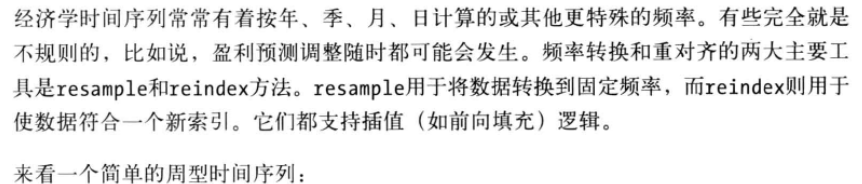

In [44]:
ts1 = Series(np.random.randn(3),index = pd.date_range('2012-6-13',periods=3,freq='W-WED'))
ts1

2012-06-13    0.972518
2012-06-20    1.594315
2012-06-27   -0.893728
Freq: W-WED, dtype: float64

In [63]:
ts1 = ts1.resample('B').mean().ffill()
ts1

2012-06-13    0.972518
2012-06-14    0.972518
2012-06-15    0.972518
2012-06-18    0.972518
2012-06-19    0.972518
2012-06-20    1.594315
2012-06-21    1.594315
2012-06-22    1.594315
2012-06-25    1.594315
2012-06-26    1.594315
2012-06-27   -0.893728
Freq: B, dtype: float64

In [54]:
dates = pd.DatetimeIndex(['2012-6-12','2012-6-17','2012-6-18',
                          '2012-6-21','2012-6-22','2012-6-29'])
ts2 = Series(np.random.randn(6),index=dates)
ts2

2012-06-12    0.889872
2012-06-17    1.971492
2012-06-18    0.335434
2012-06-21   -1.446839
2012-06-22   -0.094960
2012-06-29    1.151046
dtype: float64

In [64]:
ts1.reindex(ts2.index).ffill()

2012-06-12         NaN
2012-06-17         NaN
2012-06-18    0.972518
2012-06-21    1.594315
2012-06-22    1.594315
2012-06-29    1.594315
dtype: float64

In [65]:
ts2+ts1.reindex(ts2.index).ffill()

2012-06-12         NaN
2012-06-17         NaN
2012-06-18    1.307952
2012-06-21    0.147476
2012-06-22    1.499355
2012-06-29    2.745361
dtype: float64

## 使用period
某公司发布其以6月结尾的财年的每季度盈利报告，即频率为Q-JUN。来看两个有关GDP和通货膨胀的宏观经济时间序列。

In [66]:
gdp = Series([1.78,1.94,2.08,2.01,2.15,2.31,2.46],
            index = pd.period_range('1984Q2',periods=7,freq='Q-SEP'))
gdp

1984Q2    1.78
1984Q3    1.94
1984Q4    2.08
1985Q1    2.01
1985Q2    2.15
1985Q3    2.31
1985Q4    2.46
Freq: Q-SEP, dtype: float64

In [67]:
infl = Series([0.025,0.045,0.037,0.04],
             index=pd.period_range('1982',periods=4,freq='A-DEC'))
infl

1982    0.025
1983    0.045
1984    0.037
1985    0.040
Freq: A-DEC, dtype: float64

由于时间序列尺度不同，由period索引的两个不同频率的时间序列之间的运算需要显式转换。  
本例中，假设已知infl值是在每年年末观测的，于是我们可以将其转换到Q-SEP已得到该频率下的正确时期：

In [69]:
infl_q = infl.asfreq('Q-SEP',how='e')
infl_q

1983Q1    0.025
1984Q1    0.045
1985Q1    0.037
1986Q1    0.040
Freq: Q-SEP, dtype: float64

In [70]:
infl_q.reindex(gdp.index).ffill()

1984Q2      NaN
1984Q3      NaN
1984Q4      NaN
1985Q1    0.037
1985Q2    0.037
1985Q3    0.037
1985Q4    0.037
Freq: Q-SEP, dtype: float64

## 时间和“最当前”数据选取